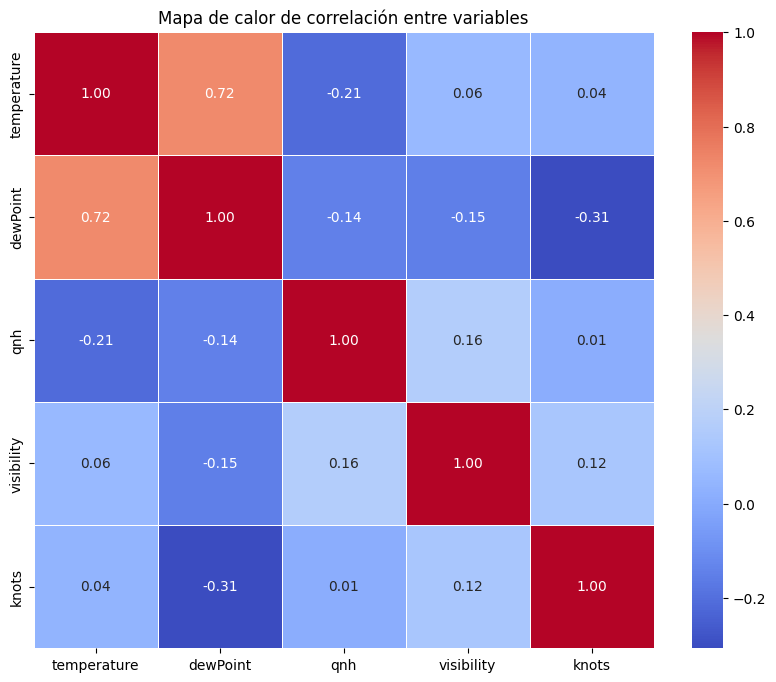

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

dir = 'LEMG_All.csv'

# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Seleccionar las columnas relevantes
relevant_columns = ['temperature', 'dewPoint', 'qnh', 'visibility', 'knots']
correlation_data = data[relevant_columns].dropna()  # Eliminar filas con valores nulos

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()


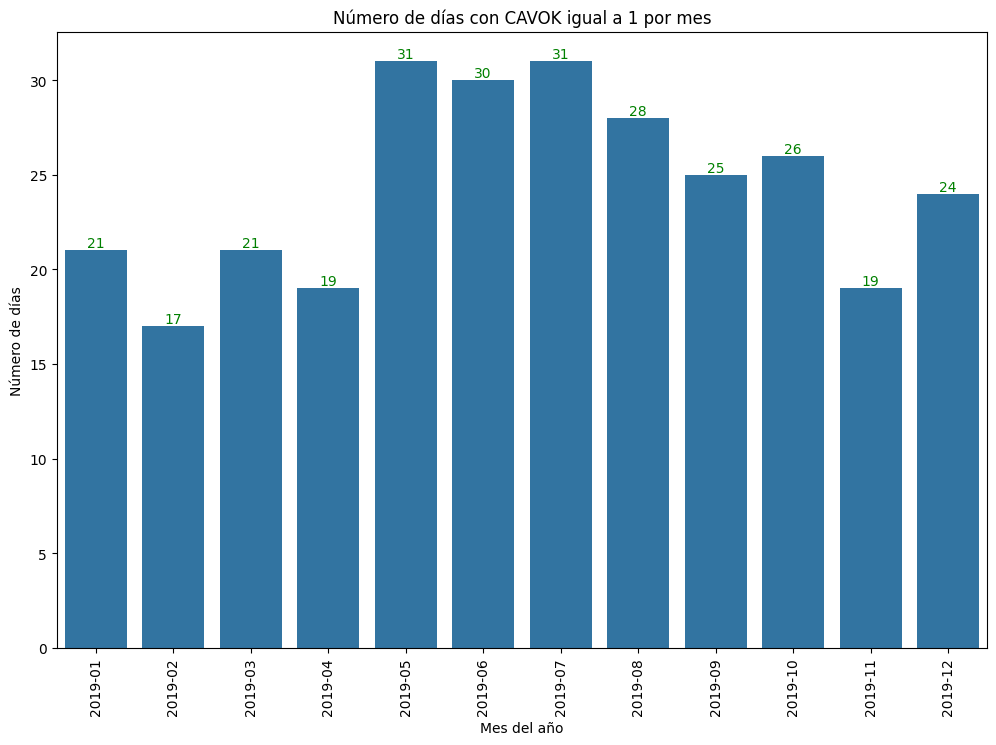

In [2]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Convertir la columna dateTime a tipo datetime para extraer la fecha (sin tiempo)
data['dateTime'] = pd.to_datetime(data['dateTime']).dt.date

# Extraer el mes y el año para agrupar por ellos
data['Month'] = pd.to_datetime(data['dateTime']).dt.month
data['Year'] = pd.to_datetime(data['dateTime']).dt.year

# Suponiendo que la columna CAVOK indica 1 si el día fue CAVOK y 0 de lo contrario
data['CAVOK'] = data['CAVOK'].fillna(0).astype(int)
daily_cavok = data.groupby(['Year', 'Month', 'dateTime'])['CAVOK'].max().reset_index()

# Agrupar por año y mes para contar los días CAVOK, asegurándose de convertir los sumatorios a enteros
monthly_cavok = daily_cavok.groupby(['Year', 'Month'])['CAVOK'].sum().reset_index()

# Preparar los datos para el gráfico
monthly_cavok['Year_Month'] = monthly_cavok['Year'].astype(str) + '-' + monthly_cavok['Month'].astype(str).str.zfill(2)

# Gráfico de barras
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=monthly_cavok, x='Year_Month', y='CAVOK')
plt.title('Número de días con CAVOK igual a 1 por mes')
plt.xlabel('Mes del año')
plt.ylabel('Número de días')
plt.xticks(rotation=90)  # Rotar las etiquetas para mejor visualización

# Añadir, low_memory=False etiquetas a cada barra
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', color='green')

plt.show()


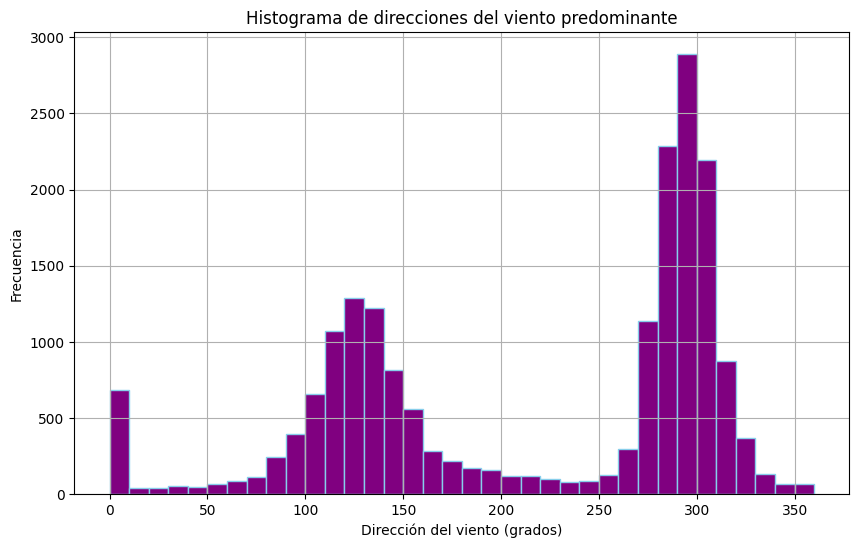

In [3]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Filtrar los datos para asegurarse de que solo se incluyan valores válidos de dirección del viento
wind_direction_data = data['direction'].dropna()

# Crear el histograma de direcciones del viento
plt.figure(figsize=(10, 6))
plt.hist(wind_direction_data, bins=36, color='purple', edgecolor='skyblue')  # 36 bins para cubrir cada 10 grados
plt.title('Histograma de direcciones del viento predominante')
plt.xlabel('Dirección del viento (grados)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


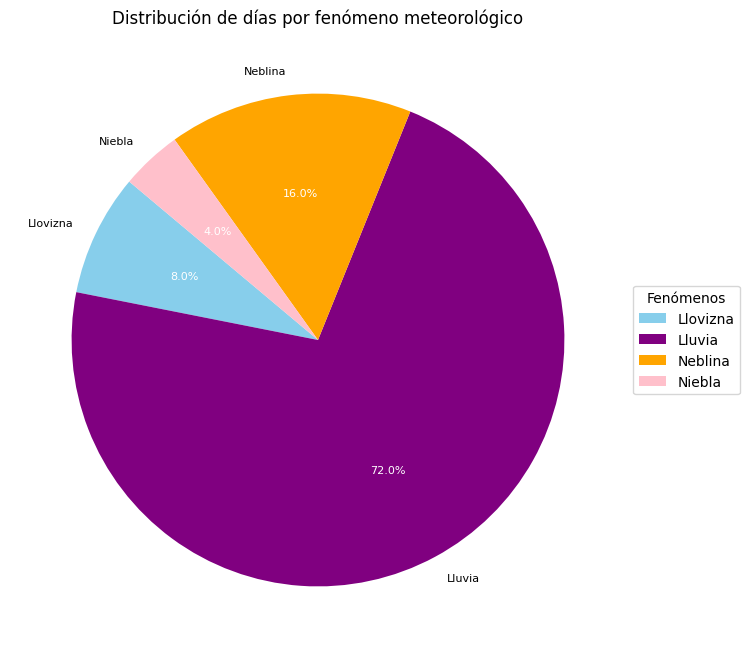

In [4]:
# Asumiendo que 'data' es tu DataFrame cargado y procesado correctamente
data = pd.read_csv(dir, low_memory=False)

# Convertir la columna dateTime a tipo datetime para extraer la fecha (sin tiempo)
data['dateTime'] = pd.to_datetime(data['dateTime']).dt.date

# Agrupar por fecha y fenómeno, contando las ocurrencias diarias de cada fenómeno
daily_phenomena = data.groupby(['dateTime', 'phenomenon1']).size().reset_index(name='counts')

# Agrupar por fenómeno para contar cuántos días distintos tuvieron cada tipo de fenómeno
phenomenon_counts = daily_phenomena.groupby('phenomenon1').size()

# Definir colores personalizados para cada fenómeno
colors = ['skyblue', 'purple', 'orange', 'pink', 'brown', 'grey']

# Crear el gráfico de tarta
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
wedges, texts, autotexts = plt.pie(phenomenon_counts, labels=phenomenon_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Mejorar la legibilidad de las etiquetas
plt.setp(texts, size=8)
plt.setp(autotexts, size=8, color='white')

# Añadir, low_memory=False leyenda
plt.legend(wedges, phenomenon_counts.index, title="Fenómenos", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribución de días por fenómeno meteorológico')
plt.show()




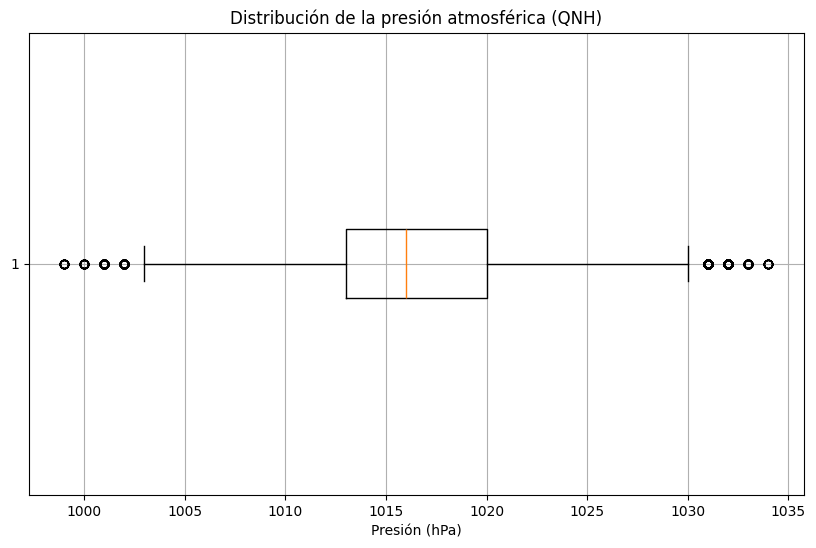

In [5]:
# Cargamos los datos desde el archivo CSV
data = pd.read_csv(dir, low_memory=False)

# Filtramos los datos para asegurarnos de que solo consideramos entradas con QNH disponible
qnh_data = data[data['qnh'].notnull()]

# Creamos el gráfico de caja
plt.figure(figsize=(10, 6))
plt.boxplot(qnh_data['qnh'], vert=False)  # vert=False para hacer el gráfico horizontal
plt.title('Distribución de la presión atmosférica (QNH)')
plt.xlabel('Presión (hPa)')
plt.grid(True)

# Mostrar el gráfico
plt.show()


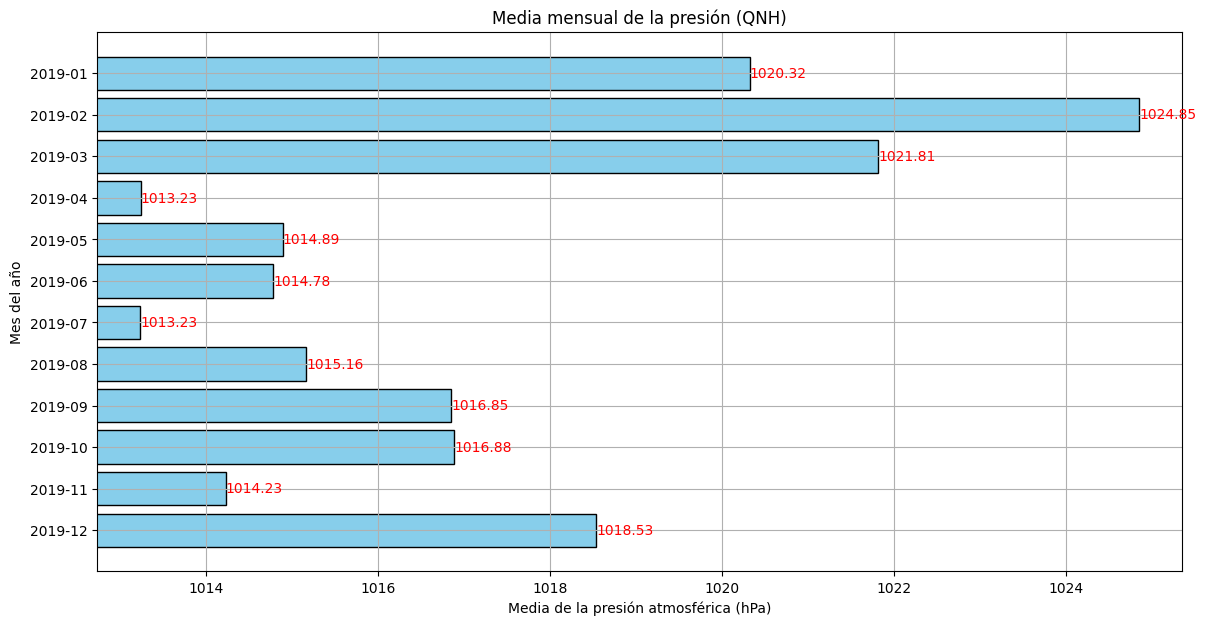

In [6]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Convertir la columna 'dateTime' a datetime
data['dateTime'] = pd.to_datetime(data['dateTime'])

# Extraer el año y mes en formato 'YYYY-MM'
data['year_month'] = data['dateTime'].dt.to_period('M').astype(str)  # Convertir a string dir, low_memory=Falseectamente

# Agrupar los datos por 'year_month' y calcular la media de 'qnh'
monthly_qnh = data.groupby('year_month')['qnh'].mean().dropna()

# Crear un gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.barh(monthly_qnh.index, monthly_qnh.values, color='skyblue',edgecolor='black')
plt.xlabel('Media de la presión atmosférica (hPa)')
plt.ylabel('Mes del año')
plt.title('Media mensual de la presión (QNH)')
plt.grid(True)

# Configurar los límites del eje x para enfocar en las variaciones
plt.xlim(monthly_qnh.min() - 0.5, monthly_qnh.max() + 0.5)

# Mostrar los valores de la media en las barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}",
             va='center', color='red')

# Mejorar la visualización rotando las etiquetas del eje y para que se ajusten mejor
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar los meses en orden cronológico
plt.show()


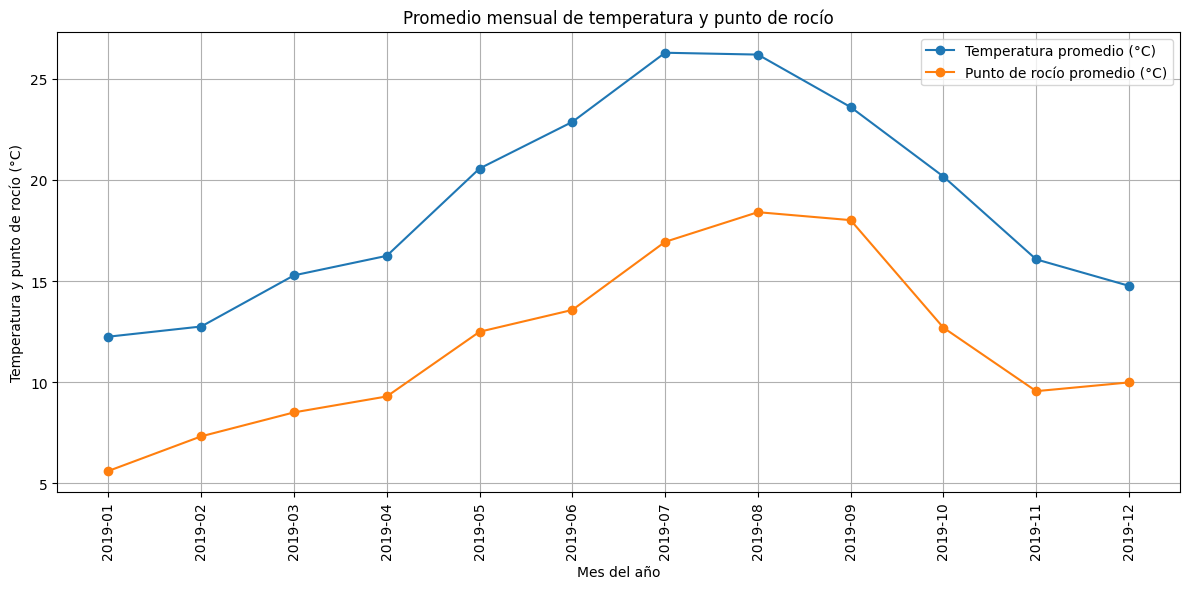

In [7]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Convertir columnas de fecha
data['dateTime'] = pd.to_datetime(data['dateTime'])

# Agregar una columna de mes
data['Month'] = data['dateTime'].dt.to_period('M')

# Calcular promedios mensuales para temperatura y punto de rocío
monthly_avg = data.groupby('Month').agg({'temperature': 'mean', 'dewPoint': 'mean'}).reset_index()

# Gráfico de líneas para temperatura y punto de rocío
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['Month'].astype(str), monthly_avg['temperature'], label='Temperatura promedio (°C)', marker='o')
plt.plot(monthly_avg['Month'].astype(str), monthly_avg['dewPoint'], label='Punto de rocío promedio (°C)', marker='o')
plt.title('Promedio mensual de temperatura y punto de rocío')
plt.xlabel('Mes del año')
plt.ylabel('Temperatura y punto de rocío (°C)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


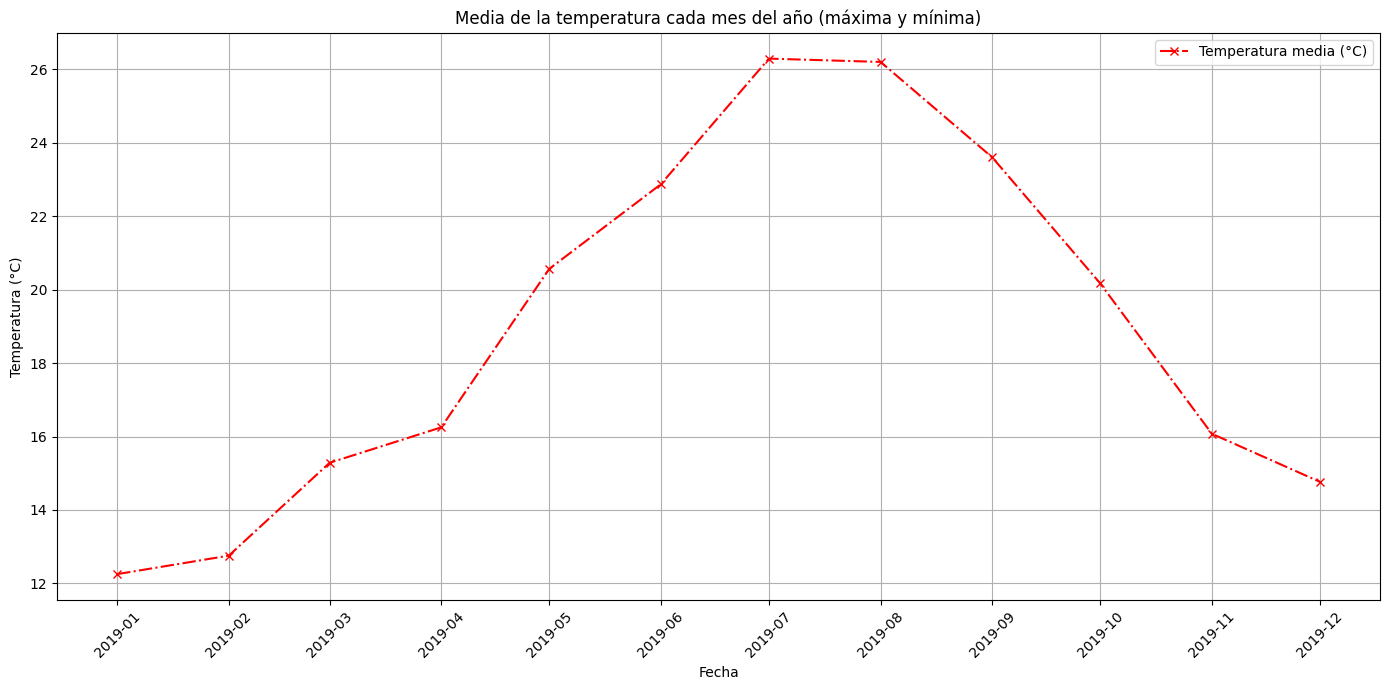

In [8]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Convertir las columnas de fecha de texto a tipo datetime
data['dateTime'] = pd.to_datetime(data['dateTime'])

# Crear una columna 'YearMonth' para agrupar los datos por mes
data['YearMonth'] = data['dateTime'].dt.to_period('M').dt.to_timestamp()

# Filtrar datos para asegurarse que la temperatura no sea nula y agrupar por 'YearMonth'
temperature_data = data[['YearMonth', 'temperature']].dropna()
monthly_temperature = temperature_data.groupby('YearMonth').mean().reset_index()

# Crear la serie temporal de temperatura
plt.figure(figsize=(14, 7))
plt.plot(monthly_temperature['YearMonth'], monthly_temperature['temperature'], label='Temperatura media (°C)', color='red', marker='x', linestyle='-.')

# Configurar el formato del eje X para mostrar todos los meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

plt.title('Media de la temperatura cada mes del año (máxima y mínima)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()  # Ajustar automáticamente los parámetros del subplot para dar espacio a las etiquetas
plt.show()


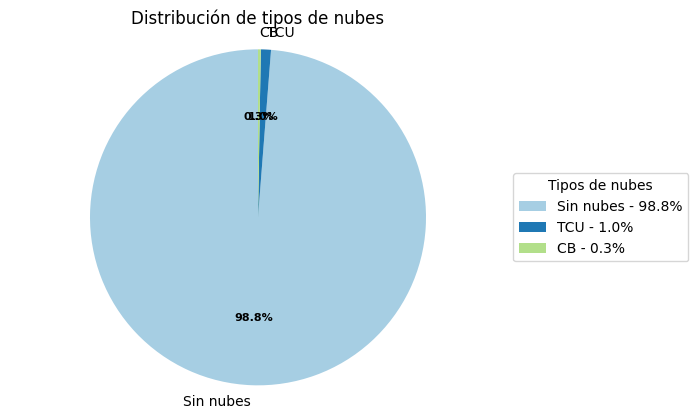

In [9]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Limpiar y normalizar la columna 'type'
data['type'] = data['type'].str.strip().str.upper()

# Cambiar 'NONE' por 'Sin nubes'
data['type'] = data['type'].replace('NONE', 'Sin nubes')

# Contar la frecuencia de cada tipo de nube
cloud_types = data['type'].value_counts()

# Calcular porcentajes
total = cloud_types.sum()
percentages = (cloud_types / total * 100).round(1).astype(str) + '%'

# Colores para cada tipo, asegurando contraste y visibilidad
colors = plt.cm.Paired(range(len(cloud_types)))

# Crear el gráfico circular
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(cloud_types, labels=cloud_types.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Ajuste de las etiquetas de porcentaje para mejorar la legibilidad
plt.setp(autotexts, size=8, weight="bold")

# Añadir, low_memory=False leyenda con porcentajes
legend_labels = [f'{name} - {percent}' for name, percent in zip(cloud_types.index, percentages)]
ax.legend(wedges, legend_labels,
          title="Tipos de nubes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribución de tipos de nubes')
plt.axis('equal')  # Ensure that pie is drawn as a circle.

plt.show()

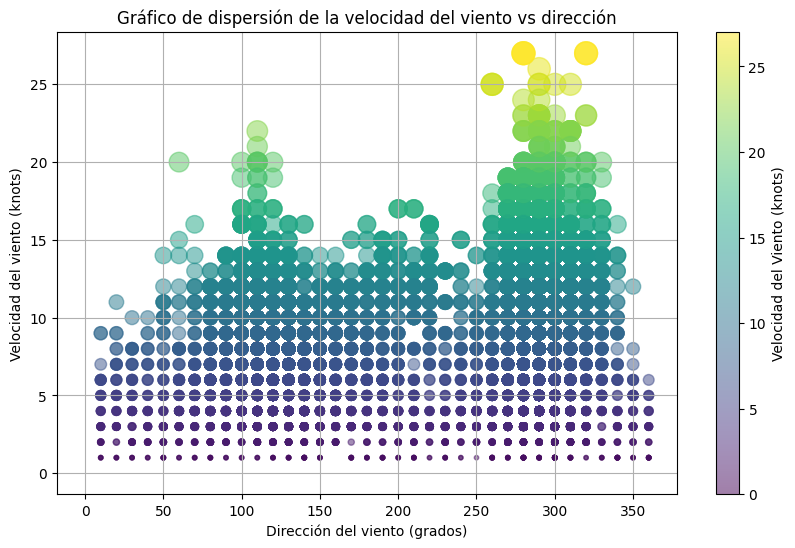

In [10]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Filtrar los datos para asegurar que solo incluimos entradas con valores no nulos para 'direction' y 'knots'
filtered_data = data[data['direction'].notnull() & data['knots'].notnull()]

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_data['direction'], filtered_data['knots'],
                      c=filtered_data['knots'],  # Color basado en la velocidad del viento
                      s=filtered_data['knots']*10,  # El tamaño del punto basado en la velocidad
                      cmap='viridis', alpha=0.5)

# Agregar un colorbar para mostrar la escala de colores basada en la velocidad del viento
plt.colorbar(scatter, label='Velocidad del Viento (knots)')

# Etiquetas y título
plt.xlabel('Dirección del viento (grados)')
plt.ylabel('Velocidad del viento (knots)')
plt.title('Gráfico de dispersión de la velocidad del viento vs dirección')
plt.grid(True)

# Mostrar el gráfico
plt.show()


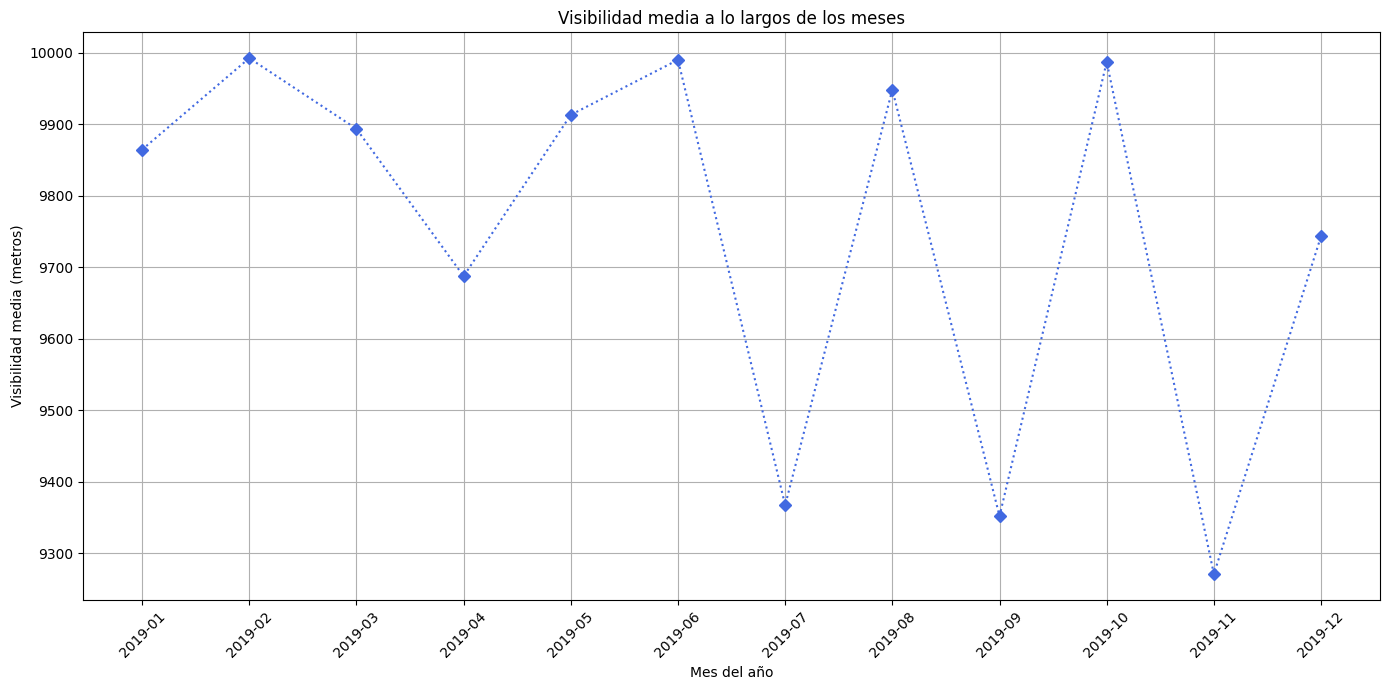

In [11]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Convertir columnas de fecha
data['dateTime'] = pd.to_datetime(data['dateTime'])

# Extraer el año y mes de cada fecha y crear una nueva columna 'YearMonth'
data['YearMonth'] = data['dateTime'].dt.to_period('M').astype(str)

# Calcular el promedio mensual de visibilidad
monthly_visibility = data.groupby('YearMonth')['visibility'].mean().reset_index()

# Crear un gráfico de líneas para mostrar los promedios mensuales
plt.figure(figsize=(14, 7))
plt.plot(monthly_visibility['YearMonth'], monthly_visibility['visibility'], marker='D', linestyle=':', color='royalblue')
plt.title('Visibilidad media a lo largos de los meses')
plt.xlabel('Mes del año')
plt.ylabel('Visibilidad media (metros)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.tight_layout()  # Ajustar automáticamente los parámetros del subplot para dar espacio a las etiquetas
plt.show()


<Figure size 1400x900 with 0 Axes>

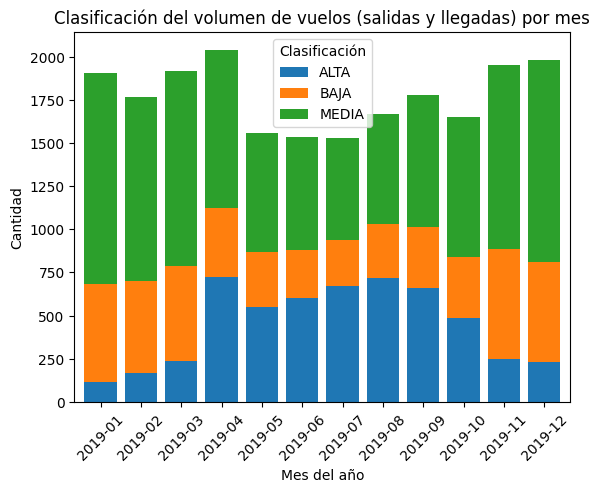

In [12]:
# Cargar los datos
data = pd.read_csv(dir, low_memory=False)

# Convertir la columna de fecha a datetime para extraer el mes y el año
data['dateTime'] = pd.to_datetime(data['dateTime'])
data['year_month'] = data['dateTime'].dt.to_period('M')

# Agrupar por año-mes y categoría de volumen, contando las ocurrencias
monthly_volume = data.groupby(['year_month', 'volume_group']).size().unstack(fill_value=0).reset_index()

# Convertir el 'year_month' de Period a String para visualización
monthly_volume['year_month'] = monthly_volume['year_month'].astype(str)

# Crear un gráfico de barras
plt.figure(figsize=(14, 9))
monthly_volume.set_index('year_month').plot(kind='bar', stacked=True, width=0.8)
plt.title('Clasificación del volumen de vuelos (salidas y llegadas) por mes')
plt.xlabel('Mes del año')
plt.ylabel('Cantidad')
plt.legend(title='Clasificación')
plt.xticks(rotation=45)
plt.show()
